In [2]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.1 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=3411a24f680fb012314ffc026fe975f220d9b384629e77e66639dbc5ca2cd2fd
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [3]:
import openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
dataset = openml.datasets.get_dataset(61)  # ID for "iris"
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Preprocess
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)


(105, 4) (45, 4)


In [7]:
import pandas as pd
X_df = pd.DataFrame(X)
display(X_df)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


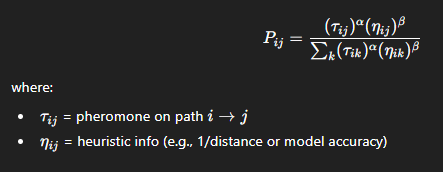

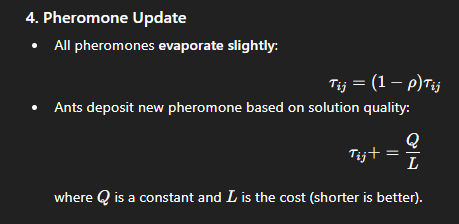

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- Ant Colony parameters ---
n_ants = 10
n_features = X_train.shape[1]
n_iterations = 20
pheromone = np.ones(n_features)
evaporation_rate = 0.2
alpha = 1  # importance of pheromone
beta = 2   # importance of heuristic (accuracy)

def evaluate_features(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train[:, selected_features == 1], y_train)
    y_pred = clf.predict(X_test[:, selected_features == 1])
    return accuracy_score(y_test, y_pred)

best_score = 0
best_features = None

for it in range(n_iterations):
    all_solutions = []
    all_scores = []

    for ant in range(n_ants):
        # Choose features based on pheromone levels
        prob = pheromone ** alpha
        prob /= prob.sum()
        selected_features = (np.random.rand(n_features) < prob).astype(int)

        score = evaluate_features(selected_features)
        all_solutions.append(selected_features)
        all_scores.append(score)

        # Update best
        if score > best_score:
            best_score = score
            best_features = selected_features.copy()

    # Update pheromone
    pheromone = (1 - evaporation_rate) * pheromone
    for i, sol in enumerate(all_solutions):
        pheromone += sol * all_scores[i]

    print(f"Iteration {it+1}, Best Score: {best_score:.4f}")

print("\nSelected Features:", best_features)
print("Best Accuracy:", best_score)


Iteration 1, Best Score: 1.0000
Iteration 2, Best Score: 1.0000
Iteration 3, Best Score: 1.0000
Iteration 4, Best Score: 1.0000
Iteration 5, Best Score: 1.0000
Iteration 6, Best Score: 1.0000
Iteration 7, Best Score: 1.0000
Iteration 8, Best Score: 1.0000
Iteration 9, Best Score: 1.0000
Iteration 10, Best Score: 1.0000
Iteration 11, Best Score: 1.0000
Iteration 12, Best Score: 1.0000
Iteration 13, Best Score: 1.0000
Iteration 14, Best Score: 1.0000
Iteration 15, Best Score: 1.0000
Iteration 16, Best Score: 1.0000
Iteration 17, Best Score: 1.0000
Iteration 18, Best Score: 1.0000
Iteration 19, Best Score: 1.0000
Iteration 20, Best Score: 1.0000

Selected Features: [1 0 1 1]
Best Accuracy: 1.0


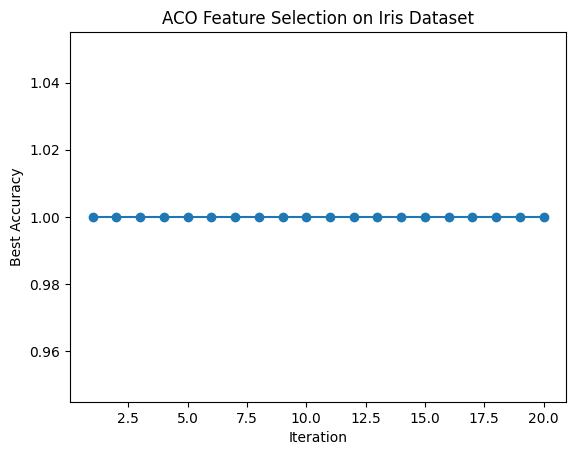

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(1, n_iterations + 1), [best_score]*n_iterations, marker='o')
plt.title("ACO Feature Selection on Iris Dataset")
plt.xlabel("Iteration")
plt.ylabel("Best Accuracy")
plt.show()
